In [1]:
library(quantmod)

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.


In [2]:
my_df <- read.csv('merged_df.csv', header=TRUE, sep=",")
my_df

Date,High,Low,Open,Close,Volume,yhat,us_china,trump,malaysia,Score,target_cls
2017-01-02,4.51,4.51,4.51,4.51,0,4.422928,62.00000,58.42857,39.42857,0,1
2017-01-03,4.57,4.51,4.53,4.54,12056200,4.438930,64.00000,61.85714,39.85714,0,1
2017-01-04,4.62,4.54,4.54,4.60,19551700,4.461632,66.00000,65.28571,40.28571,0,1
2017-01-05,4.67,4.60,4.62,4.66,20520700,4.490498,68.00000,68.71429,40.71429,0,1
2017-01-06,4.74,4.66,4.66,4.74,18234800,4.515630,70.00000,72.14286,41.14286,0,1
2017-01-09,4.79,4.74,4.75,4.76,13204800,4.534182,72.42857,81.71429,41.14286,0,1
2017-01-10,4.80,4.75,4.76,4.80,15809700,4.546839,70.85714,84.42857,40.28571,0,1
2017-01-11,4.83,4.80,4.81,4.82,19984100,4.567585,69.28571,87.14286,39.42857,0,1
2017-01-12,4.87,4.82,4.82,4.86,23162100,4.585673,67.71429,89.85714,38.57143,0,0
2017-01-13,4.88,4.81,4.85,4.82,11672300,4.591469,66.14286,92.57143,37.71429,0,0


In [3]:
rsi = round(RSI(my_df$Close, n=14, maType="WMA"),1);
rsi = c(NA, head(rsi, -1))
rsi

[1]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
 [16] 68.1 71.1 74.0 77.2 81.7 77.1 69.7 65.0 68.4 69.9 70.8 74.1 82.2 87.8 88.1
 [31] 88.5 62.6 59.2 60.5 57.7 57.3 58.6 52.7 23.5 29.3 51.8 64.0 66.4 80.8 80.7
 [46] 70.6 71.5 70.3 72.7 74.5 64.1 78.4 81.5 81.1 80.6 70.2 69.4 70.6 71.7 57.2
 [61] 59.0 59.2 51.5 45.6 27.2 16.4 18.8 17.6 22.5 13.7 13.0 36.9 45.4 47.0 53.1
 [76] 72.0 76.4 86.1 88.7 90.5 88.5 93.9 78.2 74.4 74.7 74.9 75.6 79.4 81.4 77.8
 [91] 80.0 73.3 70.2 73.1 69.3 75.6 88.2 93.4 94.0 91.8 93.2 94.8 96.2 97.4 96.0
[106] 90.9 83.5 75.6 70.5 75.9 75.9 68.9 57.5 51.0 49.5 46.1 49.6 44.1 44.8 51.4
[121] 41.5 29.4 20.2 15.9 14.9 44.7 37.7 35.0 21.9 17.3 22.9 22.9 19.2 29.6 45.3
[136] 36.0 41.9 41.3 41.7 42.2 46.4 58.3 79.6 84.0 68.4 62.7 67.3 70.3 72.3 77.6
[151] 81.7 81.9 83.1 84.5 79.0 78.9 75.1 76.7 79.8 66.5 61.8 49.6 32.5 22.7 58.4
[166] 32.9 79.6 80.1 47.5 46.7 57.0 47.4 47.9 49.7 44.1 44.3 45.3 39.5 25.0 17.7
[181] 19.2 18.8 16.9 20.6 17.3 16.3 22.5 31.3 37.2 48.7 50.8 58.3 67.8 38.7 39.8
[196] 39.3 46.4 32.9 23.5 21.8 27.7 28.9 26.8 19.5 18.7 15.0 21.6 32.0 43.4 44.8
[211] 52.1 66.1 69.3 76.7 78.8 55.8 62.8 55.5 43.7 35.5 23.4 16.2 31.4 29.0 25.7
[226] 24.8 31.8 32.0 33.1 34.7 33.8 27.8 33.7 66.5 70.3 45.1 48.4 48.7 48.8 45.6
[241] 42.2 76.8 77.8

In [4]:
# SMA LMA
ShMA = 5; LMA = 25;
sma = round(SMA(my_df$Close, ShMA),1)
sma = c(NA, head(sma, -1))

lma = round(SMA(my_df$Close, ShMA),1)
lma = c(NA, head(sma, -1))

sma

[1]  NA  NA  NA  NA  NA 4.6 4.7 4.7 4.8 4.8 4.8 4.8 4.8 4.8 4.8 4.8 4.8 4.9
 [19] 4.9 4.9 5.0 5.0 5.0 5.0 5.0 5.0 5.0 5.0 5.0 5.1 5.1 5.1 5.1 5.1 5.1 5.1
 [37] 5.1 5.1 5.1 5.0 5.0 5.1 5.1 5.2 5.3 5.3 5.4 5.4 5.4 5.4 5.4 5.4 5.5 5.5
 [55] 5.6 5.6 5.6 5.6 5.6 5.6 5.6 5.6 5.6 5.6 5.6 5.5 5.5 5.5 5.5 5.4 5.4 5.4
 [73] 5.4 5.4 5.5 5.5 5.5 5.6 5.6 5.7 5.7 5.8 5.8 5.8 5.8 5.8 5.8 5.8 5.9 5.9
 [91] 5.9 5.9 5.9 6.0 6.0 6.0 6.0 6.1 6.1 6.2 6.3 6.4 6.4 6.5 6.6 6.7 6.7 6.7
[109] 6.7 6.7 6.7 6.7 6.7 6.7 6.7 6.7 6.7 6.7 6.7 6.7 6.7 6.6 6.6 6.6 6.6 6.5
[127] 6.5 6.5 6.5 6.5 6.4 6.4 6.3 6.3 6.3 6.3 6.3 6.4 6.4 6.3 6.3 6.4 6.4 6.5
[145] 6.5 6.5 6.6 6.6 6.6 6.6 6.6 6.7 6.7 6.8 6.8 6.8 6.8 6.8 6.8 6.8 6.8 6.8
[163] 6.7 6.7 6.7 6.7 6.8 6.9 6.9 6.9 6.9 6.9 6.8 6.8 6.8 6.8 6.8 6.7 6.7 6.6
[181] 6.5 6.4 6.4 6.3 6.3 6.3 6.3 6.3 6.3 6.3 6.4 6.4 6.4 6.4 6.4 6.3 6.3 6.3
[199] 6.3 6.2 6.2 6.2 6.2 6.2 6.2 6.1 6.1 6.1 6.1 6.1 6.1 6.1 6.2 6.2 6.2 6.2
[217] 6.2 6.2 6.2 6.2 6.1 6.1 6.0 6.0 6.0 6.0 6.0 6.0 6.0 6.0 6.0 6.0 6.0 6.0
[235] 6.0 6.0 6.0 6.0 6.0 6.0 6.0 6.0 6.0

In [5]:
# ADX
df_1 = ADX(my_df[,c("High","Low","Close")])
df_1 = as.data.frame(df_1)
adx = round(df_1$ADX, 1)
adx = c(NA, head(adx, -1))
adx

[1]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA
 [16]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA 54.4 54.7
 [31] 55.0 53.6 52.2 51.3 50.5 48.9 47.4 46.0 43.0 40.5 38.4 37.9 37.5 38.6 39.5
 [46] 40.0 40.3 40.0 39.8 39.9 39.7 40.6 42.1 43.7 45.2 45.6 46.3 46.9 47.7 47.5
 [61] 47.3 46.6 45.9 45.2 43.6 41.4 39.4 37.1 35.0 33.2 31.6 29.6 27.9 26.2 25.0
 [76] 25.1 25.2 26.6 27.9 29.3 30.4 32.2 33.9 34.5 35.0 35.5 36.2 37.4 38.6 39.7
 [91] 40.8 41.9 42.3 42.7 43.2 42.9 44.1 45.9 47.7 49.3 50.9 52.7 54.7 56.8 58.8
[106] 60.6 61.5 61.4 61.5 61.6 62.1 62.3 61.5 60.2 59.1 58.2 57.2 56.2 55.3 55.5
[121] 55.4 52.7 49.8 47.2 44.7 43.1 41.7 39.5 37.3 35.7 34.2 32.3 31.3 30.2 28.5
[136] 26.5 24.7 23.0 21.4 19.9 19.1 18.4 19.6 21.4 22.2 23.0 23.7 24.5 26.3 28.0
[151] 29.8 31.6 32.8 34.0 35.2 36.3 36.9 37.7 37.6 37.5 37.4 37.3 35.4 33.6 31.3
[166] 29.3 29.9 30.5 29.0 27.7 25.8 24.0 22.3 20.9 19.7 18.7 19.2 19.6 20.9 23.1
[181] 24.9 26.6 28.6 30.4 32.0 33.4 34.8 35.6 36.0 35.3 34.6 33.7 32.6 32.9 33.1
[196] 33.0 32.8 33.0 33.9 34.6 34.4 34.0 33.5 34.0 34.7 35.3 35.8 35.4 34.3 33.2
[211] 32.2 30.2 28.4 27.1 25.8 24.4 22.8 21.3 20.5 20.8 21.7 23.4 25.1 26.6 28.2
[226] 29.9 29.7 29.5 29.4 29.2 29.5 29.7 30.2 28.1 26.2 25.8 25.5 24.8 23.7 23.1
[241] 22.9 22.9 23.3

In [6]:
# MCD
macd = MACD(my_df$Close, nFast=7, nSlow=26,nSig=9,maType=SMA, percent = FALSE)
macd = round(macd, 4)
tail(macd)
# macd = c(NA, head(adx, -1))
# signal <- Lag(ifelse(macd$macd < macd$signal, -1, 1))
# signal


,macd,signal
"[238,]",-0.0454,-0.0824
"[239,]",-0.0314,-0.0738
"[240,]",-0.0342,-0.0657
"[241,]",-0.0156,-0.0558
"[242,]",0.0184,-0.0436
"[243,]",0.0682,-0.0273


In [7]:
class = character(nrow(my_df))
class = ifelse(coredata(my_df$target_cls) >0,1,-1)
class

[1]  1  1  1  1  1  1  1  1 -1 -1  1  1 -1  1  1  1  1  1 -1 -1 -1  1 -1 -1  1
 [26]  1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1  1  1  1  1  1 -1 -1  1 -1  1  1 -1  1
 [51]  1 -1 -1 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1  1 -1  1 -1 -1  1  1 -1  1  1  1
 [76]  1 -1 -1 -1  1 -1 -1  1  1  1  1  1 -1  1 -1 -1  1 -1  1  1  1  1 -1  1  1
[101]  1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1
[126] -1 -1 -1  1 -1 -1  1  1 -1  1 -1  1  1  1  1  1  1 -1 -1  1  1  1  1  1 -1
[151]  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1 -1  1  1 -1  1  1
[176] -1 -1 -1  1 -1 -1  1 -1 -1  1  1  1  1 -1  1  1 -1  1 -1  1 -1 -1 -1  1  1
[201] -1 -1 -1 -1  1  1  1 -1  1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1
[226] -1 -1 -1 -1 -1  1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1

In [9]:
data = data.frame(rsi,sma,lma,adx,macd,my_df,class)
data = na.omit(data)

In [10]:
write.csv(data, file="data_for_modelling.csv")

In [13]:
library("rpart")
library("rpart.plot")

In [14]:
colnames(data)

[1] "rsi"        "sma"        "lma"        "adx"        "macd"      
 [6] "signal"     "Date"       "High"       "Low"        "Open"      
[11] "Close"      "Volume"     "yhat"       "us_china"   "trump"     
[16] "malaysia"   "Score"      "target_cls" "class"

In [15]:
df = data[c('rsi','sma','lma','adx','macd','signal','us_china','malaysia','Score','class')]
head(df)

,rsi,sma,lma,adx,macd,signal,us_china,malaysia,Score,class
34,60.5,5.1,5.1,51.3,0.1537,0.1500,61.71429,44.57143,0,Down
35,57.7,5.1,5.1,50.5,0.1324,0.1489,60.57143,44.85714,0,Up
36,57.3,5.1,5.1,48.9,0.1106,0.1465,59.42857,45.14286,0,Down
37,58.6,5.1,5.1,47.4,0.0839,0.1407,58.28571,45.42857,0,Down
38,52.7,5.1,5.1,46.0,0.0548,0.1305,57.28571,45.57143,0,Up
39,23.5,5.1,5.1,43.0,0.0333,0.1170,58.57143,45.14286,1,Up


In [16]:
training <- df[1:147,]
test <- df[148:nrow(df),]

In [18]:
# Model 1: decision tree
DecisionTree <- rpart(class~rsi+sma+lma+adx+macd+signal+us_china+malaysia+Score,data=training, cp=0.001)

         actual
predicted Down Up
     Down   23 16
     Up     15  9

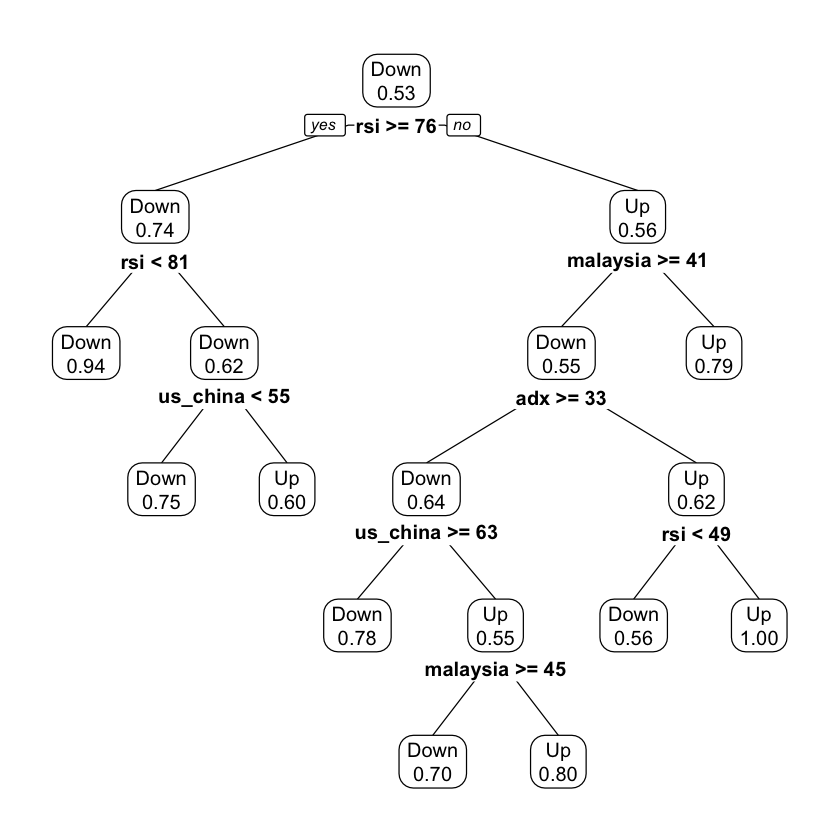

In [20]:
prp(DecisionTree, type=2, extra=8)
table(predict(DecisionTree, test, type="class"),test[,'class'], dnn=list('predicted','actual'))

In [21]:
write.csv(df, file="data_for_modelling_2.csv")